$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\dd}{\,\mathrm{d}}
$$


# Simple Steady Flows


A few cases offer analytical solutions for the Navier Stokes Equation. We start with steady flows, i.e. flows where $\partial u_j/\partial t$ vanishes.

## 2d steady flow between two plates

<div class="Figure">
<img src="pics/developing2dflow.png" width=300px>
Figure 1: Developing flow between two plates.
</div>

The flow develops after a sufficient long entrance length the space independent velocity profile, i.e. $\vb{u}=u(y)\vb{i}$. You can simulate the flow with our [flow solver](13a_Navier Stokes example.ipynb) by setting the case variable ``case='tubev' ``.

<div class="Figure">
<img src="pics/nsdevelopingflow.png" width=400px>
Figure 2: Solution to the Navier Stokes Solver. You can reproduce the result with the [notebook](13a_Navier Stokes example.ipynb) and setting the variables as ``nx = 30``, ``ny = 30``, ``xlen = 0.1``, ``ylen= 0.1``, ``nt = 1000``, ``nit = 100``, ``case='tubep'``, ``Pright=100000.``, ``rho = 1000``, ``CFL = 0.0001``.
</div>

<div class="Detail">
**You work**<p>
Where are the three profiles (red, green, and blue) in Fig. 2 taken (entrance, middle, and end)?
</div>


A flow can be driven by a pressure difference or by a moving wall. Here we will work out a solution to the Navier Stokes equation where one wall is moving and a pressure gradient is applied across the flow.

We seek to find a solution to the flow field

$$
\vb{u}=u(x,y)\vb{i} + v(x,y,)\vb{j}\tag{1}
$$

The approach is to reduce the number of terms in the N.S. equation by identifying terms which drop out, i.e. they are 0.

<div class="Figure">
<img src="pics/cpflowsketch.png" width=300px>
Figure 3: Sketch of the steady flow between two plates with $\pad{p}{x}\neq 0$, $u(y=0)=0$, and $u(y=h)=U$.
</div>

The flow is fully developed, thus it does *not* depend on the the coordinate $x$. If we investigate the conservation of mass

$$
\nabla \cdot \vb{u} = \pad{u}{x}+ \pad{v}{y}= 0 \rightarrow
\pad{v}{y}=0\quad ,\tag{2}
$$

we see that the gradient of $v$ with respect to $y$ is zero. Thus the $v$-velocity does not change with $y$. The $v$-velocity is $0$ at the lower wall $y=0$ and as it does not change with $y$ it is $v=0$ in the whole domain. Therefore, the velocity field is fully characterized by $\vb{u}=u(y)\vb{i}$.

Let's write the Navier Stokes Equation in 2 dimensions:

$$
\pad{u}{t} + u\pad{u}{x}+v\pad{u}{y} = -\frac{1}{\rho}\pad{p}{x}+
\nu\left(\ppad{u}{x}+\ppad{u}{y}\right)\tag{3a}
$$
$$
\pad{v}{t} + u\pad{v}{x}+v\pad{v}{y} = -\frac{1}{\rho}\pad{p}{y}+
\nu\left(\ppad{v}{x}+\ppad{v}{y}\right)\tag{3b}
$$

Many of the terms now drop out such that Eq. (3a) becomes

$$0=-\frac{1}{\rho}\pad{p}{x}+\nu\ppad{u}{y}\tag{4a}$$

and Eq. (3b) becomes

$$0=-\frac{1}{\rho}\pad{p}{y}\quad .\tag{4b}$$

Before you continue make sure that you understand why all these terms from Eq. (3a,b) drop out.

Now let's discuss Eq. (4a); its L.H.S. is zero, and is not a function of $x$ or $y$, thus the gradient $\partial p/\partial x$ must be constant as much as the the second derivative $\partial^2 u/\partial y^2$. We can therefore integrate Eq. (4a) twice with respect to $y$. For Eq. (4b) we see immediately that the pressure is not dependent on $y$, thus 

$$p=p(x)\quad \mathrm{and}\quad \pad{p}{x}=\fud{p}{x}$$

We now integrate Eq. (4a) twice for which we need two integration constants. These are 
$u(y=0)=0$ and $u(y=h)=U$.

Equation 4 written as an ordinary differential equation:

\begin{eqnarray*}
\fud{p}{x} & = & \mu\ffud{u(y)}{y}\\
y\fud{p}{x}+A' & = & \mu \fud{u(y)}{y}\\
\frac{1}{2}\fud{p}{x}y^2+A'y+B'&=&\mu u(y)
\end{eqnarray*}

For the velocity to be zero at $y=0$ the constant $B'=0$. $A'$ is set such that the velocity at $y=h$ matches the wall velocity, i.e. 

$$
A'=\frac{\mu U}{h}-\frac{h}{2}\fud{p}{x}\quad ,
$$

and we obtain the final solution:

$$u(y)=\frac{U}{h} y - \frac{1}{2\mu}\fud{p}{x}\,y \left( h - y\right) \quad . \tag{5}
$$

These flows are called planar *Couette-Poiseuille* flows.

With the interactive program below you can explore the regimes of pressure and wall velocity driven flows.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as widgets

h=1e-2
rho=1e3
nu=1e-6
#U=1
dpdx=100.

y = np.linspace(0., h, 100)
def plotvel(dpdx,U):
    u=U/h*y-1./(2.*nu*rho)*dpdx*y*(h-y)
    plt.plot(u,y*1e3,y*0.,y*1e3)
    plt.xlabel(r'velocity (m/s)',size=18);plt.ylabel(r'height (mm)',size=18);
    plt.tick_params(labelsize=15);

interact(plotvel, dpdx=widgets.IntSlider(min=-1000,max=1000,step=100,value=-100),
        U=widgets.FloatSlider(min=-5,max=5,step=.25,value=1));


interactive(children=(IntSlider(value=-100, description='dpdx', max=1000, min=-1000, step=100), FloatSlider(va…

The deviatoric stress tensor for an incompressible flow (see [notebook](13_Navier Stokes Equation.ipynb) Eq. 8) in 2-dimensions is

$$\sigma_{ij}=2 \mu S_{ij}=\mu \left(\pad{u_i}{x_j}+\pad{u_j}{x_j}\right)=
\mu \left( 
\begin{array}{c}
2 \pad{u}{x} & \pad{u}{y} + \pad{v}{x}\\
\pad{u}{y} + \pad{v}{x} & 2 \pad{v}{y}
\end{array}
\right)\quad .\tag{6}
$$

As our velocity field has as only component $u(y)$ the stress tensor simplifies to

$$\sigma_{12}=\sigma_{21}=\tau=\mu \pad{u}{y}=\mu \frac{U}{h} - \fud{p}{x} \left[ \frac{h}{2}-y\right]\tag{7}\quad .$$

<div class="Figure">
<img src="pics/couette_poiseuille.png" width=450px>
Figure 3: Couette and Poiseuille flows from Eq. (7).
</div>

### Couette flow

In absence of a pressure gradient $\mathrm{d}p/\mathrm{d}x$ a linear velocity profile is established. Flows between boundaries with a linear profile are called *Couette flows*, see Fig. 3 bottom left.

### Poiseuille flow

A flow driven only by a constant pressure gradient develops a flow with a maximum velocity at the center and is named *Poiseuille flow*. For planar and axisymmetric the flow profile is a parabola, see Fig. 3 bottom right.

### Combination of Couette and Poiseuille flow
Play with the program below to switch between the two profiles and discuss the shear stresses generated.


In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import math
from ipywidgets import interact
import ipywidgets as widgets

h=1e-2
rho=1e3
nu=1e-6

y = np.linspace(0., h, 100)
def plotvelstress(dpdx, U):
    u=U/h*y-1./(2.*nu*rho)*dpdx*y*(h-y)
    tau=nu*rho*U/h-dpdx*(h/2-y)
    f, axarr = plt.subplots(1,2, sharey=True, figsize=(9,5), dpi=100)


    axarr[0].plot(u,y*1e3,y*0.,y*1e3)
    axarr[0].set_xlabel(r'velocity (m/s)',size=18);axarr[0].set_ylabel(r'height (mm)',size=18);
    axarr[0].tick_params(labelsize=15)
    axarr[0].set_title('Velocity Profile',fontsize=18)
    axarr[1].plot(tau,y*1e3,y*0.,y*1e3)
    axarr[1].set_xlabel(r'Stress (Pa)',size=18);
    axarr[1].tick_params(labelsize=15)
    axarr[1].set_title(r'Deviatoric Stress $\sigma$',fontsize=18)
    axarr[0].set_xlim([-1.5,1.5]);axarr[1].set_xlim([-0.5,0.5])
    
interact(plotvelstress,\
         dpdx = widgets.FloatSlider(min = -100, max = 100, step = 10, value = -70,\
                                    description = "dp/dx (Pa/m)"),\
         U = widgets.FloatSlider(min = -1, max = 1, step = .1, value = .5,\
                                description = "U (m/s)"));


interactive(children=(FloatSlider(value=-70.0, description='dp/dx (Pa/m)', min=-100.0, step=10.0), FloatSlider…

## Flow rate and averaged flow velocity

The volumetric flow rate is the integral of the velocity over a surface, i.e. $Q=\int \vb{u} \cdot \dd\vb{A}$. For two dimensional flow and the surface taken along the $y$-axis this simplifies to:

$$
Q=\int_{y=0}^{y=h} u \dd y= \frac{Uh}{2} \left( 1- \frac{h^2}{6\mu U} \fud{p}{x}\right)\tag{8}
$$

Please note that the flow rate increases with the third power of the height of the channel $h$. What is the unity of the flow rate? Argue!

The averaged flow velocity is defined by the volumetric flowrate devided by the crossection, for 2d it is the height of the channel:

$$
V=\frac{Q}{h}=\frac{U}{2}\left( 1-\frac{h^2}{6\mu U}\fud{p}{x}\right) \tag{9}
$$

<p>
<div class="Detail">
**Your Work:**<p>
Modify above program such that you show the averaged flow velocity and the Reynolds number in the plot. You could use the ``text`` function from ``matplotlib``, for example<p> 
``axarr[0].text( 0, h*500, 'Max. u(y)={0}'.format(max(u)), fontsize=18)``<p> would plot the maximum value of the velocity in the center of the left plot (``subplot``).
</div>

## Flow in a tube

Next we want to solve the pressure driven flow, aka Poiseuille flow, in a circular tube with a constant crossesction and no-slip boundaries.

<div class="Figure">
<img src="pics/sketchtube.png" width=300px>
Figure 4: Flow in an axisymmetric tube with coordinates $(r,\varphi)$.
</div>


<div class="Detail">
**Navier Stokes Equation in cylindrical coordinates**<p>

\begin{eqnarray*}
\pad{u_r}{t}+(\vb{u} \cdot \nabla) u_r - \frac{u^2_\varphi}{r}&=&-\frac{1}{\rho}\pad{p}{r}+\nu\left(\nabla^2 u_r-\frac{u_r}{r^2}-\frac{2}{r^2}\pad{u_\varphi}{\varphi}\right),\\
\pad{u_\varphi}{t} + (\vb{u} \cdot \nabla) u_\varphi + \frac{u_r \, u_\varphi}{r} & =&
-\frac{1}{\rho r}\pad{p}{\varphi}+\nu\left(\nabla^2 u_\varphi + \frac{2}{r^2}\pad{u_r}{\varphi} - \frac{u_\varphi}{r^2}\right),\\
\pad{u_z}{t}+(\vb{u} \cdot \nabla) u_z & =& -\frac{1}{\rho}\pad{p}{z}+\nu\nabla^2 u_z,\\
\mathrm{where: }\quad \vb{u}\cdot\nabla &=& u_r \pad{}{r} + \frac{u_\varphi}{r}\pad{}{\varphi}+u_z\pad{}{z}\\
\mathrm{and}\quad \nabla^2&=&\frac{1}{r}\pad{}{r}\left(r\pad{}{r}\right)+\frac{1}{r^2}\ppad{}{\varphi}+\ppad{}{z}
\end{eqnarray*}
You find them also in Kundo and Cohen in Appendix B.
</div>

From symmetry and boundary conditions the only velocity component is

$$\vb{u} = u_z(r)\vb{e}_z\quad ,\tag{10}$$

where $\vb{e_z}$ is the unit vector in $z$-direction. We obtain for the $r$ and $\varphi$ N.S. equation 

\begin{eqnarray*}
0&=&\pad{p}{\varphi}\\
0&=&\pad{p}{r}\quad ,
\end{eqnarray*}
thus the the pressure is only a function of $z$, e.g.

$$p=p(z)\tag{11}\quad .$$

The $z$-component N.S. equation then becomes

$$0 = -\fud{p}{z} + \frac{\mu}{r}\fud{}{r}\left(r\fud{u_z}{r}\right)\quad .\tag{11}
$$

with the boundary condition $u(r=a)=0$. Integrating Eq. (11) twice we obtain

$$u_z(r)=\frac{r^2}{4\mu}\fud{p}{z}+ A \ln r + B\quad .\tag{12}
$$

Because the flow is bounded at $r=0$, the $\ln$-term must vanish and we remain with one integration constant $B$. Integrating Eq. (12) twice and inserting the boundary condition we obtain:

$$u_z(r)=\frac{r^2-a^2}{4\mu}\fud{p}{z}\tag{13}
$$


The only non-zero deviatoric stress tensor component is

$$\sigma_{zr}=\mu\left(\pad{u_r}{z}+\pad{u_z}{r}\right) = \frac{r}{2} \fud{p}{z}\tag{14}\quad .$$

We can now integrate the volumetric flow rate through the tube's cross-section.

$$Q=\int_S \vb{u}\cdot\dd \vb{S}= 
\int_0^a\int_0^{2\pi} u(r) r \dd \varphi \,\dd r =
-\frac{\pi a^4}{8\mu}\fud{p}{z}\tag{15}$$

It is interesting to note that for a constant pressure gradient the volumetric flow rate is strongly dependent on the tube's radius $a$. 



## Poiseuille flow flow in an arbitrary crossectional channel

<div class="Figure">
<img src="pics/sketchtube_arb.png" width=400px>
Figure 5: Tube of arbitrary cross-section.
</div>

The steady flow in a cylinder with arbitrary but constant cross-section must follow the 

$$\vb{u}=u_x(y,z)\,\vb{e}_x\quad .$$

The Navier Stokes equations reduces to

$$0=  -\nabla p + \mu \nabla^2\,u_x(y,z)\,\vb{e}_x$$

Symmetry dictates that only this equation remains

$$\mu\left[\ppad{}{y}+\ppad{}{z}\right]\,u_x(y,z)=\pad{p(x)}{x}$$

The right side and left side must be constant, thus $p(x)=\mathrm{Const}\cdot x$. The boundary condtions for $x=0$ and $x=L$ inserted results in the linear pressure drop provide this constant and we obtain:

$$p(x)=\frac{\Delta p}{L}\left(L-x\right)+p_0$$

\begin{eqnarray}
\left[\ppad{}{y}+\ppad{}{z}\right]\,u_x(y,z)&=&-\frac{\Delta p}{\mu L}\quad \mathrm{for}\, (y,z) \in {\cal C} \\
u_x(y,z)&=&0 \quad \quad \quad \mathrm{for}\, (y,z) \in \partial{\cal C}\tag{16}
\end{eqnarray}

The volumetric flux $Q$ and mass flux $Q_\mathrm{mass}$ are 

$$ Q=\int_{\cal C} u_x(y,z) \,\dd y\,\dd \tag{17}z$$

and
$$ Q_\mathrm{mass}=\int_{\cal C}\rho\,u_x(y,z)\,\dd y\,\dd z \quad .\tag{18}$$ 

### Elliptic cross section

The border $\partial {\cal}$ of an ellipse with semiaxis $a$ and $b$ is given by

$$1-\frac{y^2}{a^2}-\frac{z^2}{b^2}=0\tag{19}$$

The L.H.S. of Eq. (19) is zero for points $(y,z)$ on the border and 1 at the center of the elliptic tube. The same holds for the velocity, and we just give it a try, if the L.H.S. solves the N.S. equation. As a trial solution we set in:

$$u_x(y)=u_0\left(1-\frac{y^2}{a^2}-\frac{z^2}{b^2}\right)\tag{20}$$

Inserting Eq. (20) into N.S. Eq. (16) we obtain

$$2 u_0\left(\frac{1}{a^2}+\frac{1}{b^2}\right)=-\frac{\Delta p}{\mu L}$$

and the velocity at the center is

$$ u_0=\frac{\Delta p}{2\mu\,L}\left(\frac{a^2\,b^2}{a^2+b^2}\right)\quad .\tag{21}$$

Calculating the mass flux $Q$ can be simplified in an elliptical coordinate system with variables $0\le\rho\le1$ and $0\le\phi\le2\pi$. Using these transformation equations the integral in Eqs. (17) and (18) can be solved rather simple. Let's start with the transformation 

\begin{eqnarray}
y(\rho,\phi)&=&a\rho\cos\phi\\
z(\rho,\phi)&=&b\rho\sin\phi\\
u_x(\rho,\phi)&=&u_0\left(1-\rho^2)\right)\tag{22}
\end{eqnarray}

where the last equation is the result of inserting the new variables into Eq. (20).

The integral over the surface ${\cal C}$ becomes with the help of the Jacobian matrix

$$\begin{split}\int_{\cal C}\dd y\,\dd z=\int_{\cal C}\left|\pad{(y,z)}{(\rho,\phi)}\right|\,\dd\rho\dd\phi=
\int_{\cal C}
\begin{vmatrix}\pad{y}{\rho}&\pad{z}{\rho}\\\pad{y}{\phi}&\pad{z}{\phi}\end{vmatrix}\,\dd\rho\dd\phi=\\\int_0^1\int_0^{2\pi}\begin{vmatrix}a\cos{\phi}&b\sin{\phi}\\-a\rho\sin\phi&b\rho\cos\phi\\ \end{vmatrix}\,\dd\rho\dd\phi=a\,b\int_0^{2\pi}\dd\phi\int_0^1\rho\dd\rho\end{split}\tag{23}$$

We can now calculate the integral of the velocity over the surface ${\cal C}$:

$$\int_{\cal C}u_x(y,z)\,\dd y\,\dd z=a\,b\int_0^{2\pi}\dd\phi\int_0^1 u_x(\rho,\phi)\,\rho\dd\rho=\frac{4}{\pi}\frac{1}{\mu L}\frac{a^3\,b^3}{a^2+b^2}\Delta \tag{24}p$$


<div class="Detail">
**Your Work:**<p>
Show that Eq. (24) is consistent with the earlier derivation Eq. (15).
</div>

### Rectangular cross section

Next we derive the velocity field in a channel with a rectangular cross section. The coordinate system is sketched in Figure 6, the pressure gradient is applied in $x$-direction.

<div class="Figure">
<img src="pics/sketchtube_rectangle.png" width=280px>
Figure 6: Crossection of a rectangular channel.
</div>

Following above arguments the velocity $\va{u}$ has only a x-component thus is $u_x(y,z)$. The pressure gradient in $x$ direction is constant, and using the pressure difference on the two ends of the channel, $\Delta p$ and the channel length $L$:

$$\left[\ppad{}{y}+\ppad{}{z}\right]\,u_x(y,z)=-\frac{\Delta p}{\mu L}, \quad\mathrm{for}\quad -\frac{w}{2}<y<\frac{w}{2}, \,0<z<h\tag{25}$$

The boundary conditions are:

$$u_x(y,z)=0, \quad \mathrm{for}\quad y=\pm\frac{w}{2}, \,z=0, \,z=h\tag{26}$$
 
 
We now develop the velocity field along the $z$-direction in a Fourier Series. We start with the right hand side of Eq. (25). That is a constant for $0 \le z \le h$, we thus need a Fourier series in $z$ that is $1$ for $0 \le z \le h$, similar to a [square wave](https://en.wikipedia.org/wiki/Square_wave) 

$$1=\frac{4}{\pi}\sum_{n=1,\,\mathrm{odd}}^\infty \frac{1}{n}\sin \left( n\pi \frac{z}{h}\right)\tag{27}$$

Note this is only valid for $0\le z\le h$ and would give unphysical results for other values (why?).

The coefficients in $z$-directions are fixed. Now we need to find the coefficients in $y$ direction using the following ansatz:

$$u_x(y,z)=\sum_{n=1}^\infty\, f_n(y) \sin \left(n \pi \frac{z}{h}\right)\tag{28}$$

To find the coefficients $f_n(y)$ we insert the ansatz into the LHS of Eq. (25) and obtain


$$\left[\ppad{}{y}+\ppad{}{z}\right]\,u_x(y,z)=
  \sum_{1}^\infty\left[ \ffud{f_n}{y}(y)-\frac{n^2\pi^2}{h^2}f_n(y)\right]\sin\left(n \pi \frac{z}{h}\right)\tag{29}$$

Comparing Eqs. (25) and (27) with Eq. (29) we see that $f_n(y)=0$ for all even $n$ and 

$$\ffud{f_n}{y}(y)-\frac{n^2\pi^2}{h^2}f_n(y)=-\frac{\Delta p}{\mu L}\frac{4}{\pi}\frac{1}{n}\tag{30}\quad .$$

We now need to solve the inhomogenous second order differential Eq. (30) using the solution to the homogenous and a trial solution to the inhomogeneous equation: 

$$f_n(y)=f_n^\mathrm{inhomog}(y) + f_n^\mathrm{homog}(y)\quad .$$

The inhomogeneous solution is easily found by setting $f_n^\mathrm{homog}=\mathrm{const}$

\begin{eqnarray}
\left(\frac{n\pi}{n}\right)\,f_n(y)&=&\frac{4}{\pi\,n}\left(\frac{\Delta p}{\mu L}\right)\\
f_n(y)&=&\frac{4}{\pi^3\,n^3}\left(\frac{\Delta p}{\mu L}\right)\tag{31}
\end{eqnarray}

The general solution for homogeneous ODE 

$$\ffud{f_n}{y}(y)=\frac{n^2\pi^2}{h^2}f_n(y)\tag{32}\quad.$$

is a linear combination of $\exp$ functions, which can be written as

$$f_n^\mathrm{homog}=A\cosh\left(\frac{n\pi}{h}\,y\right)+B\sinh\left(\frac{n\pi}{h}\,y\right)\tag{33}$$

Using the boundary conditions $f_n(\pm\frac{1}{2}w)=0$ we obtain for $A$ and $B$

\begin{eqnarray}
A&=&-\frac{4}{\pi^3\,n^3}\frac{\Delta p\,h^2}{\mu\,L}\frac{1}{\cosh\left(\frac{n\pi w}{2 h}\right)}\tag{34a}\\
B&=&0\tag{34b}
\end{eqnarray}

Thus we obtain for the function $f_n(y)$ for the homogeneous and inhomogeneous part

$$f_n=\frac{4 h^2\,\Delta p}{\pi^3\mu L}
\frac{1}{n^3}\left(1-\frac{\cosh\left(n\pi\frac{y}{h}\right)}{\cosh\left(n\pi\frac{w}{2\,h}\right)}\right)\tag{35}$$

Inserting Eq. (35) into the expression for the velocity Eq. (28) we obtain as a final result

$$u_x(y,z)=\frac{4 h^2\,\Delta p}{\pi^3\mu L}\sum_{n,\mathrm{odd}}^\infty 
\frac{1}{n^3}\left[1-\frac{\cosh\left(n\pi\frac{y}{h}\right)}{\cosh\left(n\pi\frac{w}{2\,h}\right)}\right]\sin\left( n\pi \frac{z}{h}\right)\tag{36}$$



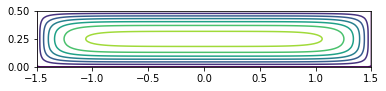

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
w=3. #width
h=.5 #height

#generate a 2x2 matrix with y and z values on the locations of the matrix
y,z=np.meshgrid(np.linspace(-w/2.,w/2.,100),np.linspace(0.,h,100))

ux=np.zeros_like(y)
na=np.arange(2)*2+1

for n in na:
    ux+=1./n**3*(1.- np.cosh(n*np.pi*y/h)/np.cosh(n*np.pi*w/2./h))*np.sin(n*np.pi*z/h)

plt.contour(y,z,ux)
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')


The flow rate  $Q$ is obtained from integration of Eq. (36) over the rectangular crossection.

\begin{eqnarray}
Q&=&2\int_0^{\frac{1}{2}w} \int_0^h u_x(y,z) \dd y \dd z\\
&=& \dots\\
&=& \frac{h^3\,w\,\Delta p}{12\,\mu \,L}
\left[1-\sum_{n,\mathrm{odd}}^\infty\frac{1}{n^5}\frac{192}{\pi^5}\frac{h}{w}\tan\left(n\pi\frac{h}{2w}\right)\right]\\
Q&\approx&\frac{h^3\,w\Delta p}{12\,\mu\,L}\left[1-0.630\frac{h}{w}\right]
\end{eqnarray}

The last approximation is valid for flat channels where $\frac{h}{w}\rightarrow 0$.